In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"/content/garments_worker_productivity.csv")

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
corr_matrix = df.select_dtypes(include=['number']).corr()

<Axes: >

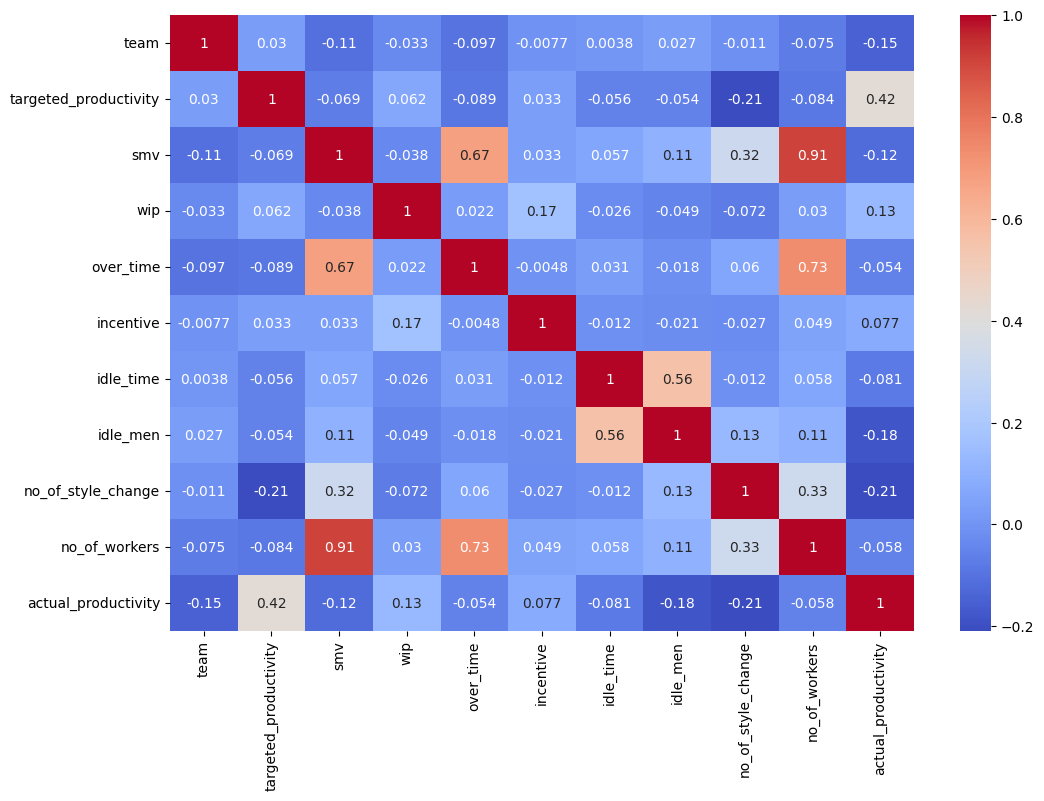

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [12]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [13]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['workday'] = df['date'].dt.dayofweek
# df['is_weekday'] = df['workday'].apply(lambda x: 1 if x >= 5 else 0)

In [14]:
#For non-linear features
# df['wip_incentive'] = df['incentive'] * df['wip'] # incentive relative to workr in progress
# df['incentive_per_worker'] = df['wip_incentive']/(df['no_of_workers'] + 1e-5) # Avg incentive per worker
df['smv_worker'] = df['smv'] * df['no_of_workers'] # Total effort required

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [16]:
df.drop(['date','id', 'no_of_style_change', 'idle_time', 'idle_men', 'wip', 'month', 'department', 'quarter'], axis=1, inplace=True, errors='ignore')

In [17]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
  def __init__(self, columns=None):
    self.columns = columns
    self.encoders = {}

  def fit(self, x):
    for col in self.columns:
      le = LabelEncoder()
      le.fit(x[col])
      self.encoders[col] = le
    return self

  def transform(self, x):
    output = x.copy()
    for col in self.columns:
      output[col] = self.encoders[col].transform(x[col])
    return output

  def fit_transform(self, x):
    return self.fit(x).transform(x)


In [18]:
cols_to_encode = ['day', 'team'] #'department', 'quarter'

encoder = MultiColumnLabelEncoder(columns=cols_to_encode)
df = encoder.fit_transform(df)

<Axes: >

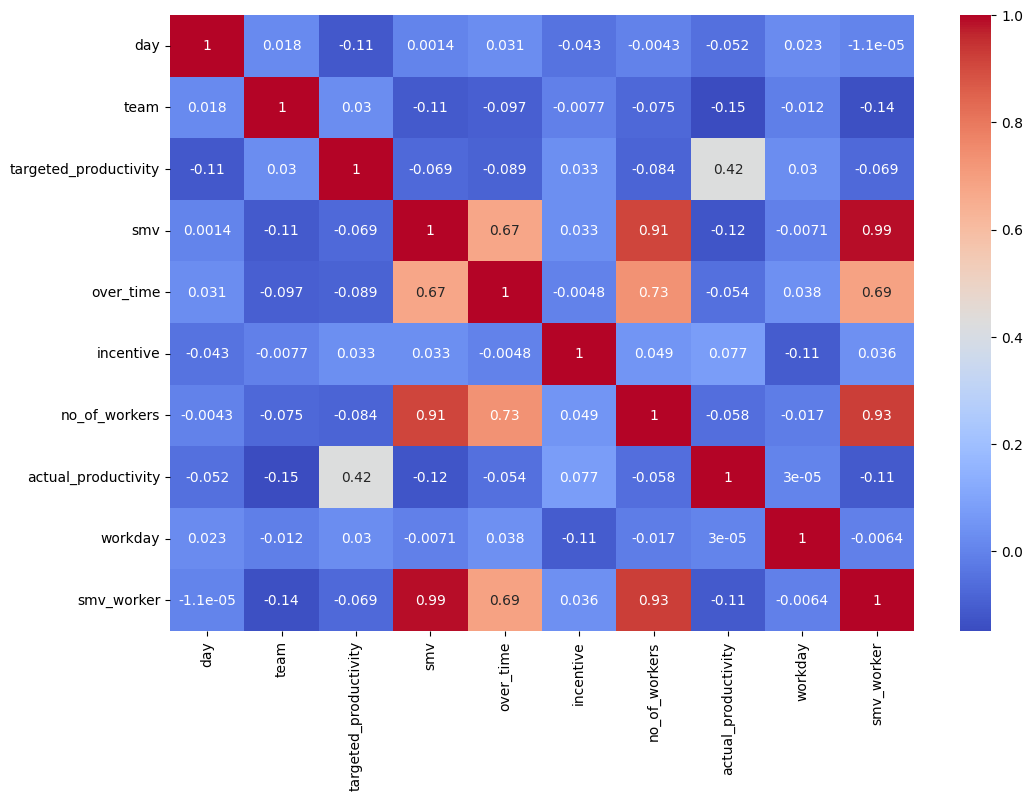

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [20]:
# Splitting & Training the Data

X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [23]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_xgb = XGBRegressor(random_state=42)

In [24]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [25]:
X_train.isnull().sum()
X_test.isna().sum()

,0
day,0
team,0
targeted_productivity,0
smv,0
over_time,0
incentive,0
no_of_workers,0
workday,0
smv_worker,0


In [26]:
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
#Comparing models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(model, x_test, y_test):
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  return mse, mae, r2

In [28]:
models = {'Linear Regression':model_lr, 'Random Forest':model_rf, 'XGBoost':model_xgb}

results = []

for name, model in models.items():
  mse, mae, r2 = evaluate_models(model, X_test, y_test)
  results.append({
      "Model": name,
      "MSE": mse,
      "MAE": mae,
      "R2 Score":r2
  })

In [29]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=True)
print(results_df)

               Model       MSE       MAE  R2 Score
0  Linear Regression  0.021828  0.106849  0.177923
2            XGBoost  0.014536  0.076245  0.452547
1      Random Forest  0.011858  0.068796  0.553396


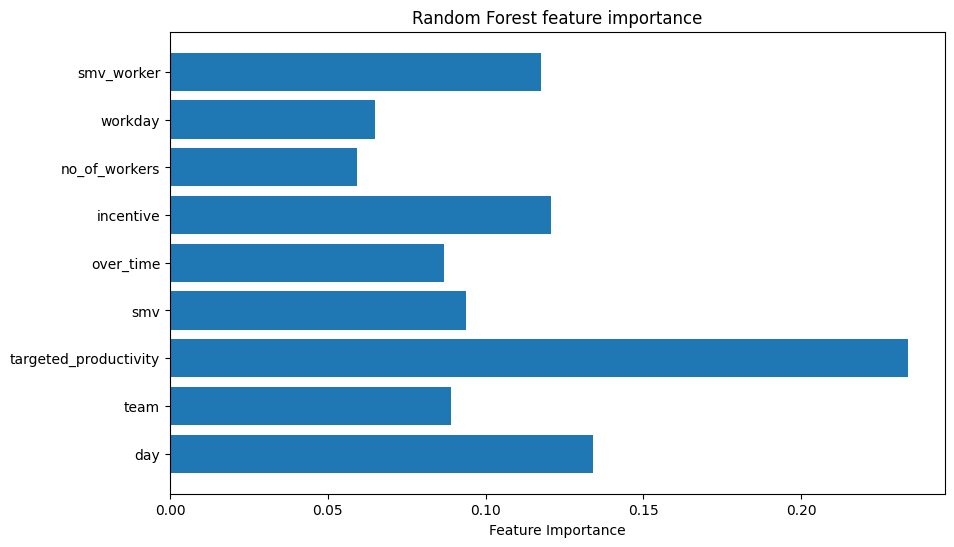

In [30]:
importances = model_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest feature importance')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,200],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2,5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, cv=3)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

In [34]:
mse, mae, r2 = evaluate_models(best_rf, X_test, y_test)
print(f"MSE = {mse}, MAE = {mae}, R2 = {r2}")

MSE = 0.01203173794680179, MAE = 0.06983080153798964, R2 = 0.5468692923085443


In [36]:
import joblib

joblib.dump(model_rf, 'gwp.pkl')

['gwp.pkl']